In [2]:
#Code to retrieve the full length sequences
from Bio import SeqIO
from Bio.SeqIO.FastaIO import FastaWriter

import pandas as pd
import numpy as np
from Bio import SeqIO
from bioinformatics import cluster, run_tantan

WT_length = {"TrpB": 389, "GB1": 56, "CreiLOV": 119}

# # Parse the table file to get sequence IDs
# hit_ids = []
# with open(tblout_file, "r") as tbl:
#     for line in tbl:
#         if not line.startswith("#"):  # Skip comments
#             cols = line.strip().split()
#             hit_ids.append(cols[0])  # Assuming the first column is the sequence ID

# # Extract sequences from the database
# with open(output_fasta, "w") as out_fasta:
#     writer = FastaWriter(out_fasta, wrap=None)
#     writer.write_header()
#     for record in SeqIO.parse(input_database, "fasta"):
#         if record.id in hit_ids:
#             writer.write_record(record)
#     writer.write_footer()

# print(f"Extracted {len(hit_ids)} sequences to {output_fasta}")

In [2]:
# # Parse a domain table file to extract aligned residue ranges
# def parse_domtblout(file_path):
#     ranges = []
#     with open(file_path, "r") as file:
#         for line in file:
#             if line.startswith("#") or not line.strip():
#                 continue  # Skip comments and empty lines
#             columns = line.split()
#             query_start = int(columns[15])  # Query start residue
#             query_end = int(columns[16])    # Query end residue
#             target_start = int(columns[17])  # Target start residue
#             target_end = int(columns[18])    # Target end residue
#             ranges.append({
#                 "query_start": query_start,
#                 "query_end": query_end,
#                 "target_start": target_start,
#                 "target_end": target_end
#             })
#     return ranges

# # Example usage
# domain_table = "/disk1/jyang4/repos/guided-discrete-diffusion/data/hmmer/jackhmmer/GB1.domtbl"  # Path to your domain table file
# aligned_ranges = parse_domtblout(domain_table)
# aligned_ranges

In [ ]:
#example usage to run hmmer search
!python hmmer/hmmer.py

In [ ]:
#read fasta file
for method in ["jackhmmer"]: #"phmmer"
    for protein in ["TrpB", "GB1", "CreiLOV"]:
        sequences = SeqIO.parse(f"hmmer/{method}/{protein}_alignment.a2m", "fasta")
        print(f"Number of sequences in {method}/{protein}_alignment.a2m: {len(set([seq.seq for seq in sequences]))}")

Number of sequences in jackhmmer/TrpB_alignment.a2m: 173118
Number of sequences in jackhmmer/GB1_alignment.a2m: 126
Number of sequences in jackhmmer/CreiLOV_alignment.a2m: 403171
Number of sequences in phmmer/TrpB_alignment.a2m: 43397
Number of sequences in phmmer/GB1_alignment.a2m: 111
Number of sequences in phmmer/CreiLOV_alignment.a2m: 59918


### Dataset filtering and resampling

In [ ]:
#save filtered sequences to fasta
# with open(f"raw_data/{protein}_alignment_filtered.fasta", "w") as f:
#     for i, row in df.iterrows():
#         f.write(f">{i}\n{row['Sequence'] }\n")

In [6]:
method = "jackhmmer"
protein = "TrpB"

In [ ]:
#sequences = SeqIO.parse(f"hmmer/{method}/{protein}_alignment.a2m", "fasta")  #alignment with dashes
sequences = SeqIO.parse(f"hmmer/{method}/{protein}/alignment.fasta", "fasta") #aligned portions of sequences
#sequences = SeqIO.parse(f"hmmer/{method}/{protein}_seqs.fasta", "fasta") #full sequences

seqs=list(set([str(s.seq) for s in sequences]))
parent_sequence = [SeqIO.read(f"{protein}.fasta", "fasta")][0]

for i in range(0, len(seqs)):
    #remove lower case letters
    seqs[i] = ''.join([i for i in seqs[i] if not i.islower()])
    #replace dashes with corresponding amino acids in parent sequence
    # seqs[i] = ''.join([parent_sequence.seq[j] if i == '-' else i for j, i in enumerate(seqs[i])])

#drop sequences with length too short compared to WT
print(len(seqs))
seqs = [s for s in seqs if len(s) >= WT_length[protein]*0.75]
#seqs = [s for s in seqs if len(s) >= WT_length[protein]*0.75]
print(len(seqs))
#for CreiLOV, limit to length 1024 context window
seqs = [s for s in seqs if len(s) <= 1022]
print(len(seqs))
#also check that it's not too long for TrpB only, CreiLOV removes too many
# seqs = [s for s in seqs if len(s) <= WT_length[protein]*1.25]
# print(len(seqs))

173115
57524
57524


In [ ]:
#save reference sequences with dashes in the alignment (not just the aligned positions)
with open(f"{protein}/reference_aligned.fasta", "w") as f:
    for i, s in enumerate(seqs):
        f.write(f">{i}\n{s}\n")

In [2]:
#get the length of characters, not including '-'
def length(seq):
    return len([i for i in seq if i != '-'])

(array([2.7990e+03, 2.2490e+03, 2.8130e+03, 4.0390e+03, 5.9770e+03,
        8.0520e+03, 1.0809e+04, 1.5343e+04, 2.0669e+04, 2.7671e+04,
        3.3030e+04, 3.5459e+04, 3.5161e+04, 3.2139e+04, 2.5540e+04,
        1.9736e+04, 3.0133e+04, 1.2875e+04, 1.0893e+04, 9.2010e+03,
        7.9190e+03, 6.1190e+03, 5.3100e+03, 3.4530e+03, 1.7830e+03,
        1.2730e+03, 7.3500e+02, 7.8900e+02, 8.8400e+02, 1.0020e+03,
        6.2600e+02, 2.9900e+02, 2.0500e+02, 2.0700e+02, 4.9000e+01,
        4.8000e+01, 8.4000e+01, 1.7000e+01, 1.5000e+01, 6.0000e+00,
        6.0000e+00, 4.0000e+00, 4.0000e+00, 4.0000e+00, 3.0000e+00,
        3.0000e+00, 3.0000e+00, 0.0000e+00, 1.0000e+00, 2.0000e+00]),
 array([ 90.  ,  91.06,  92.12,  93.18,  94.24,  95.3 ,  96.36,  97.42,
         98.48,  99.54, 100.6 , 101.66, 102.72, 103.78, 104.84, 105.9 ,
        106.96, 108.02, 109.08, 110.14, 111.2 , 112.26, 113.32, 114.38,
        115.44, 116.5 , 117.56, 118.62, 119.68, 120.74, 121.8 , 122.86,
        123.92, 124.98, 126.04

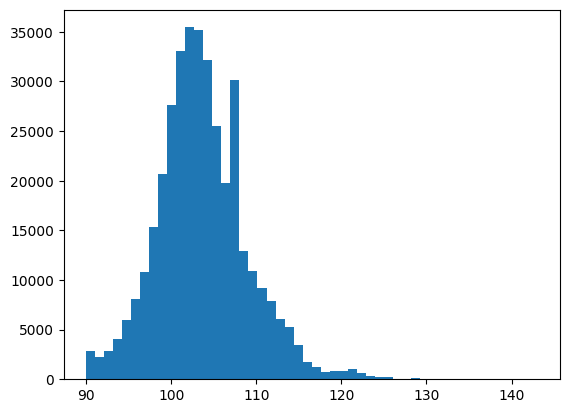

In [30]:
#histogram of sequence lengths
lengths = [len(s) for s in seqs]
import matplotlib.pyplot as plt
plt.hist(lengths, bins=50)

In [31]:
seqs[:10]

['VEQAAVAISITDTRARIVYANPCFEQVTGYTAEEIIGRNQSILSYKVTPRLVYESLWAQLARKEPWNGLLVNRRQDGSRYLADLTITPVMNDAGEVTHFLGLHRDVTEVHQLE',
 'SVIITDRERRIVYVNRGFTAVSGYGADEAMGRDPRELKRATGDAAAEAAMDATVAAGTGWVGRLTNRKKSGELYFEQAVITPVRDARGEITNYVAIGRDVTAEMRR',
 'ILDQTDRIEWVNDAYTRTTGYSLAEAVGRFPGDLLNSPQTDPASLAKLEHSRKTRTPVRVEILNRSKDGRLMWIETSINPIFDAYGKLQLWIAVERDISEAKQRE',
 'TRMEDGVFIEVNKGFEQWTGWKKEELVGRSSLDIGLWSPEARARAVAITREQGRLVNYEFVLGTKSGEKRSAVMYLTPITIQGEECLYFMVRDITESKLAE',
 'IVMTDAQGIIQFVNPAFKRITGYRGREAVGQNSRILKSGVQDEQFYHDLWSTISGGDTWSGRMVNRHKDGTFYTDETTISPVRDASDRIVNYVAVKRDITEHL',
 'GDFGINYVSNSIEEITGYAPECFTGDAAFWADHLLPEDGRKVVDELPILLEKGRQRCEYRFRTADGSYRWFDDTRRLVHSPDGSCSHIAGTWRDVTEEKRLR',
 'EGRYVALNESAWRARGLGAADVLGRTAAELFPPDVVAERLAHDRAVLESGGPVLIEHQETGPDGAPRWYETVKAPYRDAAGSIAGTVGIARDITGRRRLE',
 'LKRRIFLFNRAAERITGFNKEEVLGKDCHEVFPGKFCGEKCSFCRLGTPGLDELDKEYSVSLVSKDGKKRTITMNLFPIEGPNKKPLGVVAAFRDITEELR',
 'DADGRFLSVNARFCSMAGRRSEELLRLRMRDITHPDDRAVSETALRSAALDGEPATVEKRLVRPDGTTLWVTNTKSAIAGMAGRRNVLVVAIDIEERKAAER',
 'QDRQFRYVNHRFQELTGYRE

In [18]:
# df = run_tantan(seqs)
# df

In [32]:
df = cluster(seqs, 0.8).reset_index()
df

,1,sequence,cluster_80
0,43661,TNERGHILSVNNAYTTISGFSAKESIGLRPNILVSENQDNSFYREI...,43661
1,43662,EKWTKIYLNDEIEKLTGYTKNVFIDGDKSFSDLIHEEDRPEVMKFA...,43662
2,43663,TDSTFRITEWNQAAERIFGYSRQEALGLDPRILVPKEGQAEVAPRR...,43663
3,43664,NVVVTDLESKIEYVNDALLHDSGYSRAELLGTSARSLLSPQTTPEL...,43664
4,43665,ENITFANPAFCKMLGYTTAEICRMNLVELATRESFADIVRETLVRK...,43665
...,...,...,...
375436,66327,LDSEENIVSCNPAFEDLYGYTKNEVLGKNLDRLVTTEEIYNQGEAI...,66327
375437,66328,NLVWLKDPEGAYLACNSRFESLYGHTESEILGRTDIEFVNQEWAEF...,66328
375438,66329,TDTDATLTFLSDAWKNVTLLDVQACLHTPLFRYLHPDDHALNREQF...,66329
375439,66331,DRSHRFVKLNNGFCQFTGHSREELLGKTDYDFFKKEEADIFREKDD...,66331


In [33]:
df["cluster_80"].nunique()

263030

In [34]:
value_counts = df['cluster_80'].value_counts()
df['cluster80size'] = df['cluster_80'].apply(lambda x: value_counts[x])
df['weighted_prob'] = df['cluster80size'].apply(lambda x: 1/ (1+ np.log(x)))
sampled_df = df.sample(frac=1, weights='weighted_prob', random_state=42, replace=True) 
sampled_df

,1,sequence,cluster_80,cluster80size,weighted_prob
140535,157420,QAMLITDSKNNIININPAFFDITGYSEEEIIGKNPKLLSSGMHDAT...,157420,1,1.000000
356875,68555,QINPAFETTLGYTGEEILAKPLLNFIHPEDRATSIAEARKLASGVM...,239268,3,0.476505
275587,321106,DPEGHILTWNEGVQLIHGYSASELIGQHFSIFYTSADLIANKAENE...,343496,2,0.590616
226070,60386,IEQSTVSVVITDLCGKIQYANPMFTRITGYTREEALGQNPRILKSG...,60386,1,1.000000
59447,160182,TDAAGVITSVNPAFTEITGYAADEAIGKTPAILRSGKHDRAFYEQM...,160182,2,0.590616
...,...,...,...,...,...
227941,226017,LFGYGTDELSTDPFVWLRLVHPDDQPIAMRNWELVQSGAAETAHYE...,226017,3,0.476505
75366,74010,LILEANLTSATLLGEDRRYLIKRAFSSFITAEFQDTFCLHCKRVIE...,74010,1,1.000000
67077,196320,DGGCNFFNQSWLDFTGRTHEQECNHGWLTGVHPEDVQSCLSTYQAA...,196320,1,1.000000
291393,302324,WNEQMYEMVGLSPDVREITVEAFFHYIHPKDLPRVQENIAKALESG...,302324,1,1.000000


In [35]:
np.random.seed(42)
test_clusters = df["cluster_80"].unique()
test_clusters = np.random.choice(test_clusters, int(len(test_clusters)*0.05), replace=False)
df["Split"] = df["cluster_80"].apply(lambda x: x in test_clusters)
#map True to validation and False to training
df["Split"] = df["Split"].apply(lambda x: "validation" if x else "train")
df

,1,sequence,cluster_80,cluster80size,weighted_prob,Split
0,43661,TNERGHILSVNNAYTTISGFSAKESIGLRPNILVSENQDNSFYREI...,43661,1,1.0,train
1,43662,EKWTKIYLNDEIEKLTGYTKNVFIDGDKSFSDLIHEEDRPEVMKFA...,43662,1,1.0,train
2,43663,TDSTFRITEWNQAAERIFGYSRQEALGLDPRILVPKEGQAEVAPRR...,43663,1,1.0,train
3,43664,NVVVTDLESKIEYVNDALLHDSGYSRAELLGTSARSLLSPQTTPEL...,43664,1,1.0,train
4,43665,ENITFANPAFCKMLGYTTAEICRMNLVELATRESFADIVRETLVRK...,43665,1,1.0,train
...,...,...,...,...,...,...
375436,66327,LDSEENIVSCNPAFEDLYGYTKNEVLGKNLDRLVTTEEIYNQGEAI...,66327,1,1.0,train
375437,66328,NLVWLKDPEGAYLACNSRFESLYGHTESEILGRTDIEFVNQEWAEF...,66328,1,1.0,train
375438,66329,TDTDATLTFLSDAWKNVTLLDVQACLHTPLFRYLHPDDHALNREQF...,66329,1,1.0,train
375439,66331,DRSHRFVKLNNGFCQFTGHSREELLGKTDYDFFKKEEADIFREKDD...,66331,1,1.0,train


In [36]:
df[df["Split"] == "validation"]

,1,sequence,cluster_80,cluster80size,weighted_prob,Split
6,43667,RQIDTGELLYVNPTYEEIWGQTTESLYQDPDSWMTFLHPDDRQRIE...,43667,1,1.000000,validation
15,43678,STTDIQGRITYANDEFVKISGYSHDELLGSPHRIVRHPFMPKAAFE...,43678,1,1.000000,validation
69,70114,LDENGEVVNINDKFRKIFGYKLSEIKDKQLDDVLENTKKDNVDREK...,70114,1,1.000000,validation
73,70118,SDEKGSITYMNQTWLDWTGVSYDESMGDGWLQFIHEDDRKRVTDQM...,70118,1,1.000000,validation
126,70182,IVDVERNKLEYLSPAFENMWGEGRDKIMADLGRWIELVHPDDRDSA...,70182,1,1.000000,validation
...,...,...,...,...,...,...
375397,41785,DDFTMLYINNAIETITGYKIDEIKFNKVISFANIIHPSDLAVVHKS...,41785,2,0.590616,validation
375398,22857,DNFTMLYVNNAIETITGYKIDEIRFNRVVSFASIIHINDLTMVRKN...,41785,2,0.590616,validation
375405,41794,IDPETAKIVECNHLACESMGRTAEQLRTQTVLDLQDDVLCLSHWRS...,41794,1,1.000000,validation
375408,41797,LSCAFVVCNAQQHDKPIEFCSESFERLTGYTKHEIRGQNCRFLQAP...,41797,2,0.590616,validation


In [24]:
from visualization import plot_logo

In [ ]:
plot_logo(df, protein, sites=[183, 184, 227, 228])

NameError: name 'ax' is not defined

In [ ]:
df.to_csv(f"{protein}/MSA_aligned.csv", index=False)

In [ ]:
pd.read_csv(f"TrpB/MSA.csv")

NameError: name 'pd' is not defined

### Save 1000 random sequences as a fasta

In [ ]:
sites = [117, 118, 119, 162, 166, 182, 183, 184, 185, 186, 227, 228, 230, 231, 301]

parent = "MKGYFGPYGGQYVPEILMGALEELEAAYEGIMKDESFWKEFNDLLRDYAGRPTPLYFARRLSEKYGARVYLKREDLLHTGAHKINNAIGQVLLAKLMGKTRIIAETGAGQHGVATATAAALFGMECVIYMGEEDTIRQKLNVERMKLLGAKVVPVKSGSRTLKDAIDEALRDWITNLQTTYYVFGSVVGPHPYPIIVRNFQKVIGEETKKQIPEKEGRLPDYIVACVSGGSNAAGIFYPFIDSGVKLIGVEAGGEGLETGKHAASLLKGKIGYLHGSKTFVLQDDWGQVQVSHSVSAGLDYSGVGPEHAYWRETGKVLYDAVTDEEALDAFIELSRLEGIIPALESSHALAYLKKINIKGKVVVVNLSGRGDKDLESVLNHPYVRERIR"
#map back positions that are not in sites to the parent
vocab = "ACDEFGHIKLMNPQRSTVWY"

def map_back(seq, sites):
    mapped_seq = ""
    for i in range(len(seq)):
        if i+1 in sites:
            #print if not in vocab
            if seq[i] not in vocab:
                print(f"Not in vocab: {seq[i]} at position {i+1}") 
                #replace with a random letter
                mapped_seq += np.random.choice(list(vocab))
            else:
                mapped_seq += seq[i]
        else:
            mapped_seq += parent[i]
        
        
    return mapped_seq

In [ ]:
np.random.seed(42)
for name in ["TrpB/MSA", "CreiLOV/MSA"]:
    df = pd.read_csv(f"{name}.csv")
    df = df[df["Split"] == "train"]
    #sample 1000 rows
    df = df.sample(1000, random_state=42)
    #save to fasta
    if name == "TrpB_MSA":
        df["sequence"] = df["sequence"].apply(lambda x: map_back(x, sites))
    #check rows for characters not in vocab
        
    with open(f"{name}/sample.fasta", "w") as f:
        for i, row in df.iterrows():
            f.write(f">{i}\n{row['sequence']}\n")

Not in vocab: X at position 162
